<a href="https://colab.research.google.com/github/Jeongye/RAMI/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix


USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

random.seed(16)
torch.manual_seed(16)
if device == 'cuda':
  torch.cuda.manual_seed_all(16)

# hyperparameter
training_epochs = 25
batch_size = 256

다음 기기로 학습합니다: cuda


In [34]:
mnist_train = datasets.MNIST(root='MNIST_data/',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)
mnist_test = datasets.MNIST(root='MNIST_data/',
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)

data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

print("len(data_loader)", len(data_loader))

len(data_loader) 234


In [35]:
model = nn.Sequential(
    nn.Linear(784, 350),
    nn.ReLU(),
    nn.Linear(350, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.Sigmoid(),
    nn.Linear(50, 10),
).to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

In [36]:
for epoch in range(training_epochs):
  total_cost = 0

  for X, Y in data_loader:
    X = X.view(-1, 28 ** 2).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    total_cost += cost
    optimizer.step()
  
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(total_cost / batch_size))

Epoch: 0001 cost = 1.146046162
Epoch: 0002 cost = 0.286270440
Epoch: 0003 cost = 0.163674057
Epoch: 0004 cost = 0.119318269
Epoch: 0005 cost = 0.092329897
Epoch: 0006 cost = 0.092604473
Epoch: 0007 cost = 0.063091524
Epoch: 0008 cost = 0.050786197
Epoch: 0009 cost = 0.041864898
Epoch: 0010 cost = 0.036266603
Epoch: 0011 cost = 0.028885309
Epoch: 0012 cost = 0.023673240
Epoch: 0013 cost = 0.020324515
Epoch: 0014 cost = 0.017191213
Epoch: 0015 cost = 0.013907249
Epoch: 0016 cost = 0.011882787
Epoch: 0017 cost = 0.009086655
Epoch: 0018 cost = 0.007629980
Epoch: 0019 cost = 0.006263876
Epoch: 0020 cost = 0.005219025
Epoch: 0021 cost = 0.004376155
Epoch: 0022 cost = 0.003927168
Epoch: 0023 cost = 0.003217403
Epoch: 0024 cost = 0.002880258
Epoch: 0025 cost = 0.002600817


In [38]:
# evaluate model with test dataset
def cm(y, y_pred):
  return confusion_matrix(y.cpu(), y_pred.cpu())

with torch.no_grad():
  X_test = mnist_test.test_data.view(-1, 28 ** 2).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  y_pred = torch.argmax(prediction, 1).to(device)

  print(cm(Y_test, y_pred))

  correct = 0
  for i in range(10):
    correct += cm(Y_test, y_pred)[i][i]

print("Accuracy: {:.2f}%".format(correct / len(X_test) * 100))

[[ 973    0    1    0    0    1    1    2    1    1]
 [   0 1128    2    2    0    0    1    0    2    0]
 [   1    1 1012    7    2    0    2    5    2    0]
 [   0    0    3 1000    0    1    0    2    3    1]
 [   1    1    3    0  954    0    4    5    1   13]
 [   7    1    0   22    2  849    5    0    4    2]
 [   7    2    4    0    2    3  940    0    0    0]
 [   1    2    5    3    0    0    0 1014    1    2]
 [   3    1    8   17    1    1    2    4  934    3]
 [   2    2    0    9    5    0    0   18    0  973]]
Accuracy: 97.77%


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label: 4
Prediction: 4


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


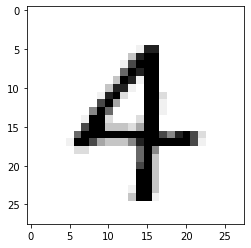

 
Label: 2
Prediction: 2


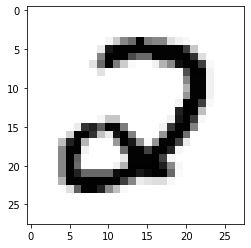

 
Label: 8
Prediction: 8


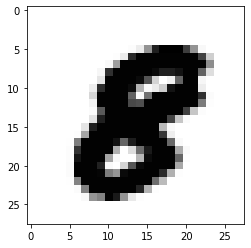

 
Label: 2
Prediction: 2


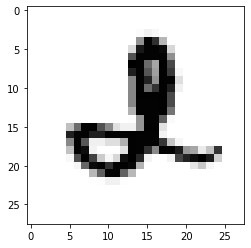

 
Label: 2
Prediction: 2


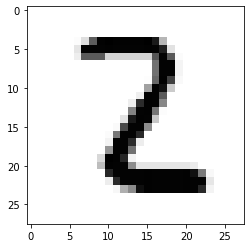

 
Label: 7
Prediction: 7


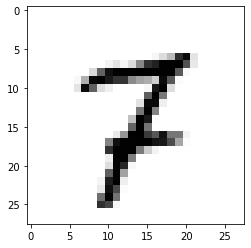

 
Label: 1
Prediction: 1


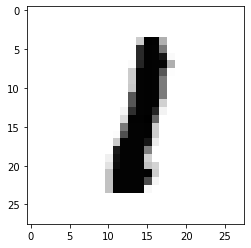

 
Label: 4
Prediction: 4


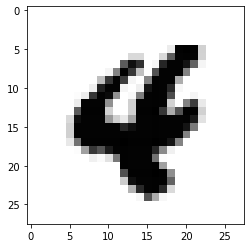

 
Label: 8
Prediction: 8


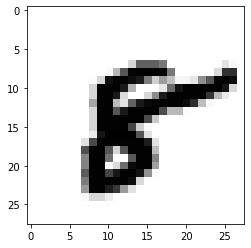

 
Label: 0
Prediction: 0


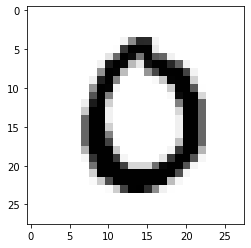

 
Label: 3
Prediction: 3


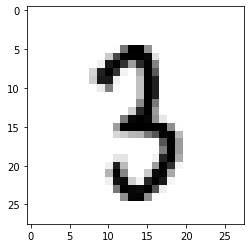

 
Label: 8
Prediction: 8


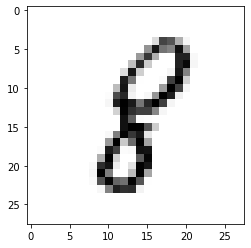

 
Label: 5
Prediction: 5


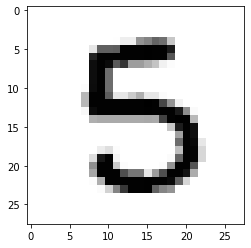

 
Label: 1
Prediction: 1


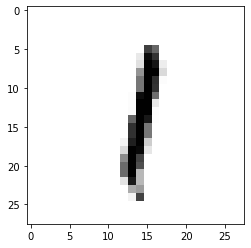

 
Label: 8
Prediction: 8


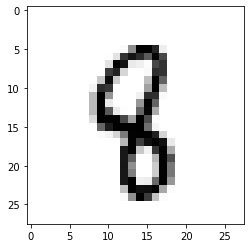

 
Label: 8
Prediction: 8


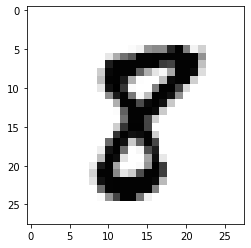

 
Label: 7
Prediction: 7


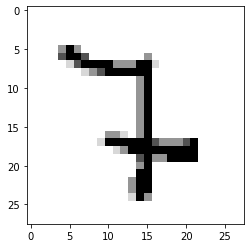

 
Label: 7
Prediction: 7


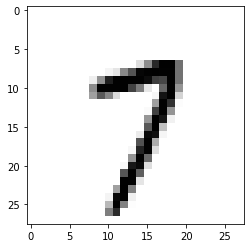

 
Label: 9
Prediction: 9


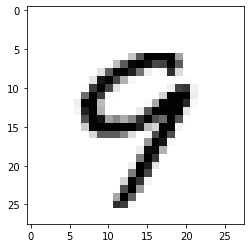

 
Label: 2
Prediction: 2


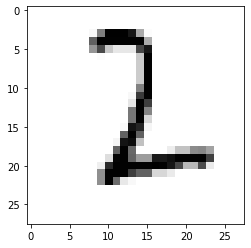

 
Label: 4
Prediction: 4


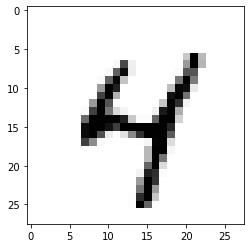

 
Label: 1
Prediction: 1


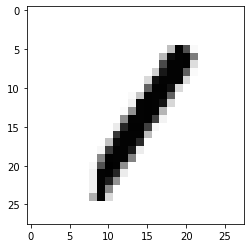

 
Label: 1
Prediction: 1


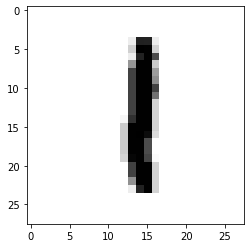

 
Label: 5
Prediction: 5


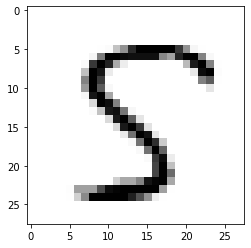

 
Label: 3
Prediction: 3


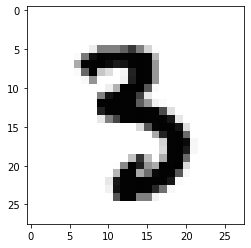

In [39]:
i = 0
for i in range(25):
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 ** 2).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
  print('Label:', Y_single_data.item())
  single_prediction = model(X_single_data)
  print('Prediction:', torch.argmax(single_prediction, 1).item())
  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()
  print(" ")